## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
db = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(db.head())
print(db.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    506
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2295  2022-05-01 00:00:00     php   4173
2296  2022-05-01 00:00:00  python  23813
2297  2022-05-01 00:00:00       r   4916
2298  2022-05-01 00:00:00    ruby    506
2299  2022-05-01 00:00:00   swift   1804


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
print(db.shape)
print(db.columns)

(2300, 3)
Index(['DATE', 'TAG', 'POSTS'], dtype='object')


**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
db.count()

DATE     2300
TAG      2300
POSTS    2300
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
grouped_db = db.groupby(['TAG'])
grouped_db.sum().sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2375506
python,1951262
java,1844695
c#,1538436
php,1434649
c++,765028
r,449639
c,379749
swift,312886


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
grouped_db.count().sort_values("POSTS", ascending=False)

,DATE,POSTS
TAG,,
c#,167,167
assembly,166,166
c,166,166
c++,166,166
delphi,166,166
java,166,166
javascript,166,166
perl,166,166
php,166,166


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
print(db["DATE"][0])
print(type(db["DATE"][0]))

2008-07-01 00:00:00
<class 'str'>


In [9]:
db["DATE"] = pd.to_datetime(db["DATE"])
print(type(db["DATE"][0]))
db.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [10]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

# test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
#                         'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
#                         'Power': [100, 80, 25, 50, 99, 75, 5, 30]})

# test_df.pivot(index='Age', columns='Actor', values='Power')

reshaped_df = db.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-01-01,240.0,2061.0,5906.0,3884.0,151.0,791.0,7687.0,16236.0,131.0,3999.0,22584.0,4246.0,477.0,1987.0
2022-02-01,225.0,1790.0,5831.0,3482.0,187.0,688.0,7275.0,15461.0,97.0,3723.0,22641.0,4340.0,457.0,1883.0
2022-03-01,254.0,2104.0,6488.0,3847.0,134.0,831.0,8127.0,16369.0,105.0,3771.0,24607.0,5090.0,528.0,2079.0
2022-04-01,268.0,1881.0,5966.0,3866.0,121.0,759.0,7891.0,16056.0,101.0,3833.0,23696.0,4784.0,494.0,1781.0
2022-05-01,297.0,1959.0,6439.0,4013.0,130.0,721.0,8079.0,16464.0,96.0,4173.0,23813.0,4916.0,506.0,1804.0


In [12]:
reshaped_df.shape

(167, 14)

In [13]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [14]:
reshaped_df.count()

TAG
assembly      166
c             166
c#            167
c++           166
delphi        166
go            151
java          166
javascript    166
perl          166
php           166
python        166
r             164
ruby          166
swift         158
dtype: int64

In [15]:
reshaped_df = reshaped_df.fillna(0) 
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1648.0,753.0,104.0,0.0,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1151.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,581.0,97.0,502.0,452.0,1.0,159.0,0.0


In [16]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

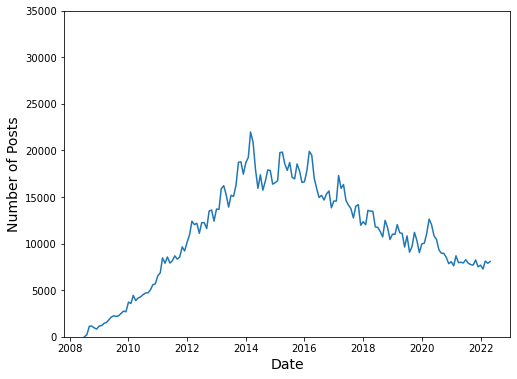

In [17]:
# https://matplotlib.org/

plt.figure(figsize=(8,6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

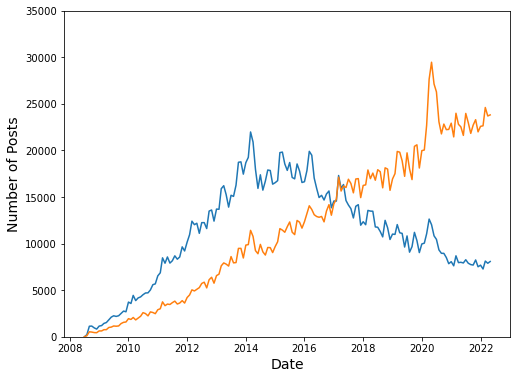

In [18]:
plt.figure(figsize=(8,6))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

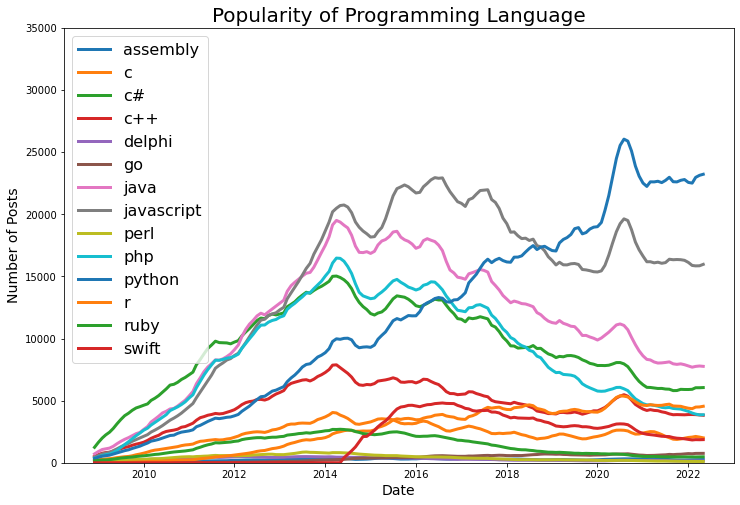

In [26]:
# ----- 計算動態平均 ----- #

roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(12,8))
plt.title("Popularity of Programming Language", fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


# 使用for迴圈添加資料
for column in roll_df.columns:
    plt.plot(reshaped_df.index, 
             roll_df[column],
             linewidth=3, 
             label=roll_df[column].name
            )

    
# ----- 設置圖例說明 ----- #

plt.legend(fontsize=16)  # 顯示每條線的label
plt.show()